In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [11]:
df=pd.read_csv('concertriccir2.csv')

In [12]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       500 non-null    float64
 1   Y       500 non-null    float64
 2   class   500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

<Axes: xlabel='X', ylabel='Y'>

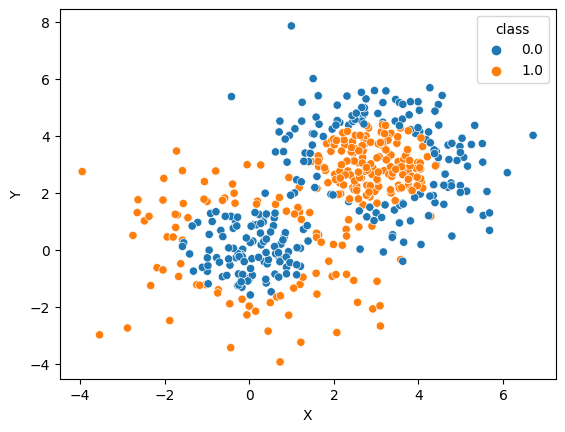

In [14]:
sns.scatterplot(x=df['X'],y=df['Y'],hue=df['class'])

In [20]:
x=df.iloc[:]
from sklearn.model_selection import  train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['class']),df['class'],test_size=.2)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


# model without batch normalization 

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [33]:
modelone=Sequential()
modelone.add(Dense(256,activation='relu',input_dim=2))
modelone.add(Dense(128,activation='relu'))
modelone.add(Dense(1,activation='sigmoid'))
modelone.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               768       
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33793 (132.00 KB)
Trainable params: 33793 (132.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
modelone.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
historyone=modelone.fit(x_train,y_train,validation_split=.2,epochs=100)

Epoch 1/100


10/10 [==============================] - 1s 29ms/step - loss: 0.6885 - accuracy: 0.5125 - val_loss: 0.6831 - val_accuracy: 0.5500
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6690 - accuracy: 0.5500 - val_loss: 0.6701 - val_accuracy: 0.5875
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6551 - accuracy: 0.5750 - val_loss: 0.6635 - val_accuracy: 0.5500
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6496 - accuracy: 0.5906 - val_loss: 0.6587 - val_accuracy: 0.6375
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6333 - accuracy: 0.6250 - val_loss: 0.6433 - val_accuracy: 0.7000
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6333 - accuracy: 0.6438 - val_loss: 0.6460 - val_accuracy: 0.6500
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6195 - accuracy: 0.6781 - val_loss: 0.6258 - val_accuracy: 0.6875
Epoch 8/100
10/10 [====

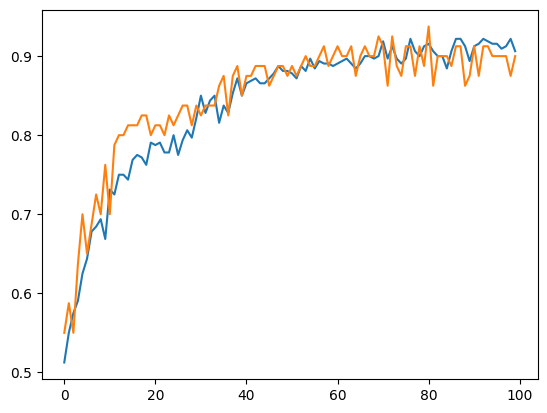

In [36]:
plt.plot(historyone.history['accuracy'])
plt.plot(historyone.history['val_accuracy'])

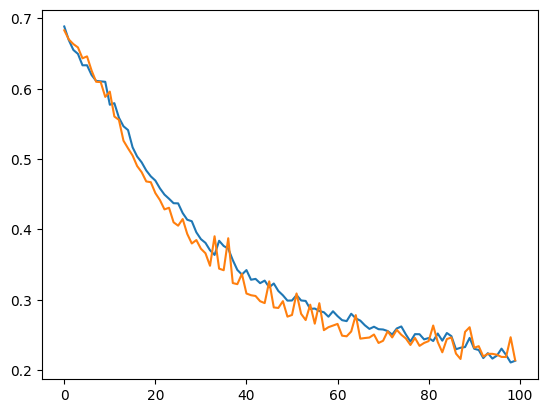

In [37]:
plt.plot(historyone.history['loss'])
plt.plot(historyone.history['val_loss'])

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

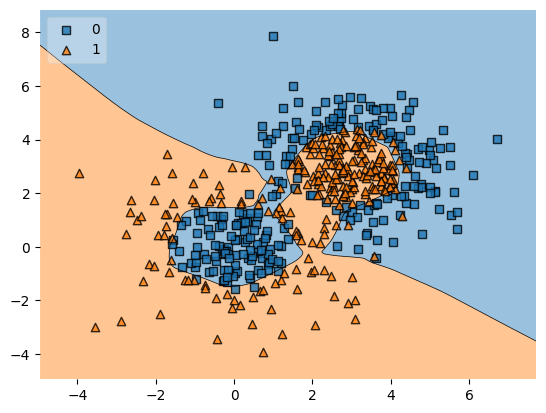

In [32]:
plot_decision_regions(df.iloc[:, 0:2].values,df.iloc[:,-1].values.astype('int'),clf=modelone,legend=2)

# model with batchnormalization

In [39]:
from tensorflow.keras.layers import BatchNormalization

In [41]:
modeltwo=Sequential()
modeltwo.add(Dense(256,activation='relu',input_dim=2))
modeltwo.add(BatchNormalization())
modeltwo.add(Dense(128,activation='relu'))
modeltwo.add(BatchNormalization())
modeltwo.add(Dense(1,activation='sigmoid'))
modeltwo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               768       
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 35329 (138.00 KB)
Trainable params: 3456

In [42]:
modeltwo.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [43]:
historytwo=modeltwo.fit(x_train,y_train,validation_split=.2,epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 36ms/step - loss: 0.5916 - accuracy: 0.6594 - val_loss: 0.6861 - val_accuracy: 0.4375
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4445 - accuracy: 0.7969 - val_loss: 0.7011 - val_accuracy: 0.4250
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4663 - accuracy: 0.7969 - val_loss: 0.6736 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3905 - accuracy: 0.8313 - val_loss: 0.6856 - val_accuracy: 0.5875
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3697 - accuracy: 0.8375 - val_loss: 0.6788 - val_accuracy: 0.6250
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3605 - accuracy: 0.8375 - val_loss: 0.6717 - val_accuracy: 0.6250
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3616 - accuracy: 0.8250 - val_loss: 0.6830 - val_accuracy: 0.6000
Epoch 8/100

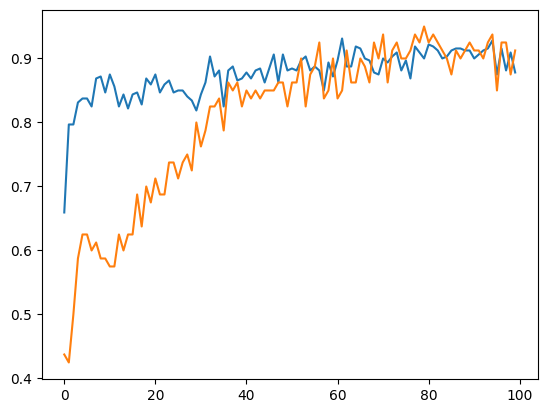

In [44]:
plt.plot(historytwo.history['accuracy'])
plt.plot(historytwo.history['val_accuracy'])

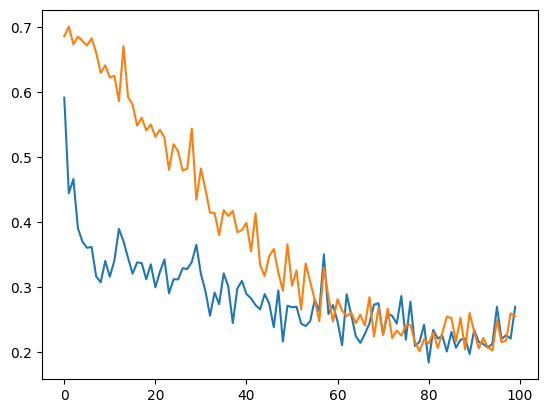

In [45]:
plt.plot(historytwo.history['loss'])
plt.plot(historytwo.history['val_loss'])

9600/9600 [==============================] - 19s 2ms/step


<Axes: >

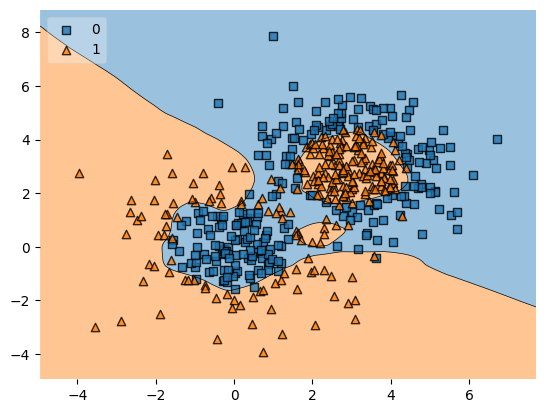

In [46]:
plot_decision_regions(df.iloc[: ,0:2].values,df.iloc[:,-1].values.astype('int'),clf=modeltwo,legend=2)

accuracy

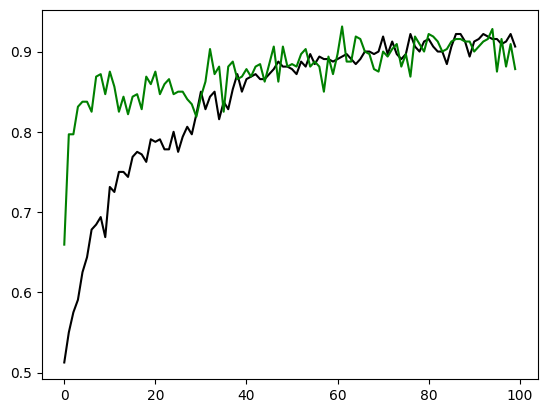

In [50]:
plt.plot(historyone.history['accuracy'],color='black')
plt.plot(historytwo.history['accuracy'],color='green')

validation accurcy

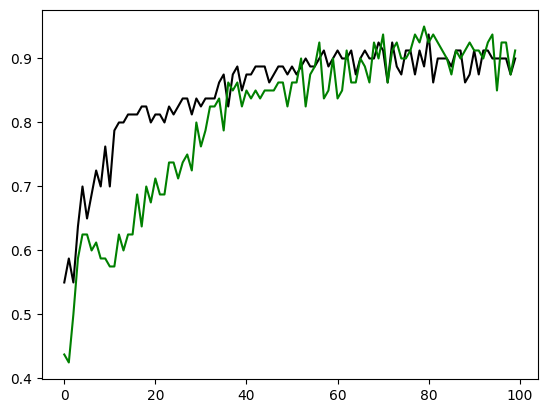

In [52]:
plt.plot(historyone.history['val_accuracy'],color='black')
plt.plot(historytwo.history['val_accuracy'],color='green')

same we can see the loss and validation loss of the model before and after batchnormalization

side by side comparison

17500/17500 [==============================] - 34s 2ms/step


Text(0.5, 1.0, 'model after batch normalization')

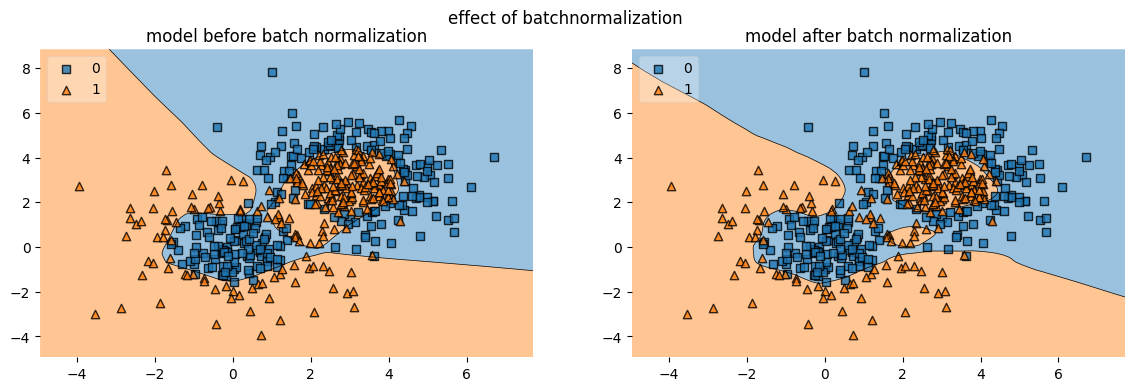

In [55]:
plt.figure(figsize=(14,4))
plt.suptitle('effect of batchnormalization')
plt.subplot(121)
plot_decision_regions(df.iloc[: ,0:2].values,df.iloc[:,-1].values.astype('int'),clf=modelone,legend=2)
plt.title('model before batch normalization')
plt.subplot(122)
plot_decision_regions(df.iloc[: ,0:2].values,df.iloc[:,-1].values.astype('int'),clf=modeltwo,legend=2)
plt.title('model after batch normalization')